<a href="https://colab.research.google.com/github/vishnu190/PYTHON-PROJECT-CA3/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/project.csv')
print(data.shape)
print(data.head)
print(data.columns)


(30000, 25)
<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0          1      20000    2  ...         0         0                           1
1          2     120000    2  ...         0      2000                           1
2          3      90000    2  ...      1000      5000                           0
3          4      50000    2  ...      1069      1000                           0
4          5      50000    1  ...       689       679                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996     220000    1  ...      5000      1000                           0
29996  29997     150000    1  ...         0         0                           0
29997  29998      30000    1  ...      2000      3100                           1
29998  29999      80000    1  ...     52964      1804                           1
29999  30000      50000    1  ...      1000      1000   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
print(data.isna().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

data["EDUCATION"] = data["EDUCATION"].replace({4:0,5:0,6:0})
data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [ ]:
data["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [ ]:
x_train=data[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y_train=data['default payment next month']

In [ ]:
print(y_train.head)
y_train.describe()

<bound method NDFrame.head of 0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64>


count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [ ]:
df=pd.concat([x_train[['AGE','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',]],y_train],axis=1)


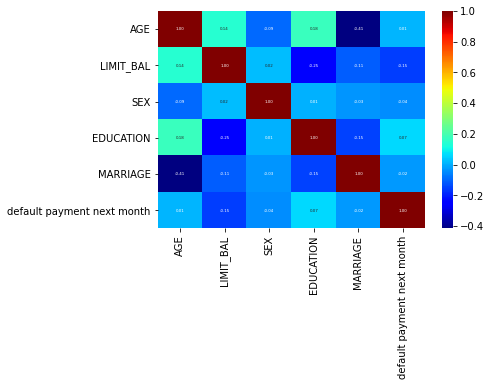

In [41]:
  # PERFORMING CO-RELATIONAL ANALYSIS
col=df.corr()

sns.heatmap(col,annot=True,cmap='jet',fmt='.2f',annot_kws={'size':4},
            cbar=True)
mask = np.zeros_like(col,dtype=np.bool)

cmap = sns.diverging_palette(220,10,as_cmap=True)



#i selected some of the features while creating a HEATMAP ,so that it would be clear

In [ ]:
#TO find performance 


In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)


In [45]:
pred_train #print

array([-0.02419673,  0.42575665, -0.05850514, ...,  0.24745391,
        0.23809502,  0.2293908 ])

In [47]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE= ",mean_squared_error(y_train,pred_train))
print("R2= ",r2_score(y_train,pred_train))

MSE=  0.1523629227516607
R2=  0.12240199030543863


In [48]:

c=lr.intercept_
m=lr.coef_
print("SLOPE= ",m)
print("INTERCEPT= ",c)


SLOPE=  [-1.46202753e-08 -6.52157331e-08 -1.91874639e-02 -6.74491706e-03
 -2.47523937e-02  1.22643348e-03  8.81720650e-02  2.35745692e-02
  1.17873212e-02  1.12408841e-04  5.28247450e-03  7.77703944e-03
 -7.04007259e-07  1.28140381e-07  5.47403248e-08  1.65497727e-08
 -1.02613524e-07  2.02373546e-07 -7.86037830e-07 -1.34074628e-07
 -2.50187611e-07 -2.52999268e-07 -4.09660567e-07 -1.44994935e-07]
INTERCEPT=  0.3147544543442408


In [ ]:
#print('y=%.fx + %.2fc'%(m,c))

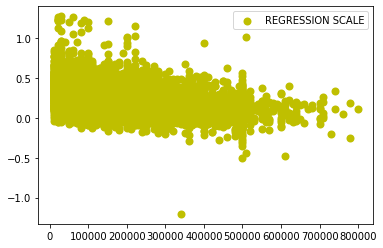

In [49]:
import matplotlib.pyplot as plt
plt.scatter(x_train['LIMIT_BAL'],pred_train,label='REGRESSION SCALE',c='y',lw=2)
plt.legend()

In [50]:
from sklearn.linear_model import ElasticNet
lr=ElasticNet()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))


[0.28764733 0.22144499 0.02877441 ... 0.24020558 0.27318772 0.25172803]
TRain MSE= 0.16810098783270694
R2 train= 0.03175201889420731


In [52]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

[0.28764778 0.22137693 0.02880424 ... 0.24017142 0.27315388 0.25162093]
TRain MSE= 0.16810101829820526
R2 train= 0.0317518434154217


In [53]:
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

[-0.02418753  0.42574873 -0.05849939 ...  0.24745543  0.23809491
  0.22939326]
TRain MSE= 0.15236292278347657
R2 train= 0.12240199012218178


CLEARLY RIDGE IS SHOWING BETTER PERFORMANCE THAN ELASTIC NET AND LASSO


In [54]:
# TERY ANOTHER MODEL
####### load a model
from sklearn.tree import DecisionTreeRegressor
lr=DecisionTreeRegressor(max_depth=3)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

[0.20261954 0.37639966 0.10914809 ... 0.10914809 0.10914809 0.10914809]
TRain MSE= 0.1389166743337437
R2 train= 0.19985128463708057


CLEARLY DECISION TREE IS SHOWING BETTER PERFORMANCE THAN ELASTIC NET


In [55]:
#Try another model
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor(max_depth=3)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

[0.20573558 0.3820244  0.10998469 ... 0.11011605 0.12979966 0.11352298]
TRain MSE= 0.1380705719488038
R2 train= 0.2047247653738039
